In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from keras import regularizers

In [2]:
(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

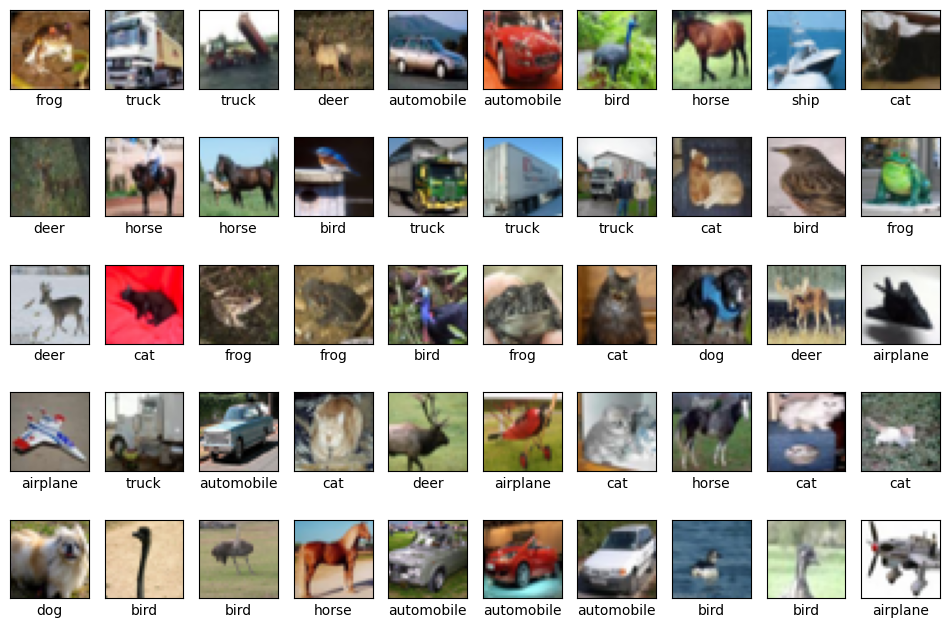

In [4]:
plt.figure(figsize=(12, 8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])
plt.show()

In [5]:
model = keras.Sequential([

    keras.Input(shape=(32, 32, 3)),

    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'), 
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),  
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),  # (14, 14)
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), 
    keras.layers.BatchNormalization(),
    keras.layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'), 
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),  # (5, 5)
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),

    keras.layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu'), 
    keras.layers.BatchNormalization(),
    keras.layers.MaxPooling2D(pool_size=(2, 2)),
    keras.layers.BatchNormalization(),
    #keras.layers.Dropout(0.2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.4),

    keras.layers.Dense(10, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 batch_normalization (Batch  (None, 32, 32, 3)         12        
 Normalization)                                                  
                                                                 
 conv2d (Conv2D)             (None, 30, 30, 32)        896       
                                                                 
 batch_normalization_1 (Bat  (None, 30, 30, 32)        128       
 chNormalization)                                                
                                                                 
 conv2d_1 (Conv2D)           (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_2 (Bat  (None, 28, 28, 32)        128       
 chNormalization)                                                
                                                        

In [6]:
import tensorflow as tf

epoch = 10
sgd_lr = 0.001
sgd_dcy = sgd_lr / epoch
optimizer_sgd = tf.keras.optimizers.legacy.SGD(learning_rate=sgd_lr, momentum=0.9, nesterov=True, decay=sgd_dcy)

In [7]:
model.compile(
    optimizer= optimizer_sgd, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [8]:
h_sgd = model.fit(x=X_train, y=Y_train, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 154s 467ms/step - loss: 2.3106 - accuracy: 0.2571 - val_loss: 1.8707 - val_accuracy: 0.2921
Epoch 2/10
293/293 [==============================] - 135s 460ms/step - loss: 1.8360 - accuracy: 0.3519 - val_loss: 1.5428 - val_accuracy: 0.4297
Epoch 3/10
293/293 [==============================] - 135s 461ms/step - loss: 1.6498 - accuracy: 0.4043 - val_loss: 1.4623 - val_accuracy: 0.4658
Epoch 4/10
293/293 [==============================] - 136s 465ms/step - loss: 1.5420 - accuracy: 0.4434 - val_loss: 1.4048 - val_accuracy: 0.4845
Epoch 5/10
293/293 [==============================] - 134s 457ms/step - loss: 1.4639 - accuracy: 0.4713 - val_loss: 1.3578 - val_accuracy: 0.5061
Epoch 6/10
293/293 [==============================] - 132s 450ms/step - loss: 1.4021 - accuracy: 0.4970 - val_loss: 1.2888 - val_accuracy: 0.5311
Epoch 7/10
293/293 [==============================] - 132s 451ms/step - loss: 1.3478 - accuracy: 0.5163 - val_loss: 1.2742 -

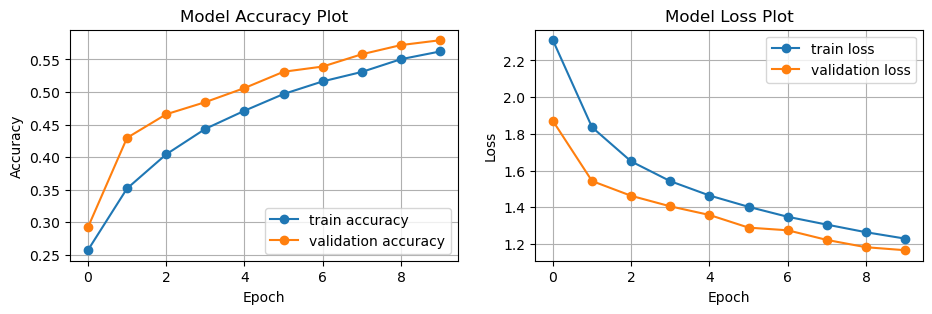

In [9]:
plt.figure(figsize=(35,3))
plt.subplot(1,6,3)
plt.title("Model Accuracy Plot")
plt.plot(h_sgd.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h_sgd.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,4)
plt.title("Model Loss Plot")
plt.plot(h_sgd.history['loss'], 'o-', label='train loss')
plt.plot(h_sgd.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [10]:
test_loss_sgd1, test_acc_sgd1 = model.evaluate(X_train, Y_train)
print("\nTest Accuracy-SGD")
print('\nTest Accuracy:', test_acc_sgd1)
print('Test Loss:', test_loss_sgd1)

1563/1563 [==============================] - 14s 9ms/step - loss: 1.1141 - accuracy: 0.5988

Test Accuracy-SGD

Test Accuracy: 0.5988199710845947
Test Loss: 1.1141407489776611


In [25]:
lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate = 0.001,
    decay_steps=10000,
    decay_rate=0.99)
epoch = 10
rmsp_lr = lr_schedule
optimizer_rmsp = keras.optimizers.RMSprop(learning_rate = rmsp_lr)

In [26]:
model.compile(
    optimizer= optimizer_rmsp, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [27]:
h_rmsp = model.fit(x=X_train, y=Y_train, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 65s 216ms/step - loss: 0.5547 - accuracy: 0.8088 - val_loss: 0.7709 - val_accuracy: 0.7548
Epoch 2/10
293/293 [==============================] - 68s 232ms/step - loss: 0.5565 - accuracy: 0.8102 - val_loss: 0.7455 - val_accuracy: 0.7558
Epoch 3/10
293/293 [==============================] - 64s 217ms/step - loss: 0.5426 - accuracy: 0.8136 - val_loss: 0.7269 - val_accuracy: 0.7625
Epoch 4/10
293/293 [==============================] - 68s 231ms/step - loss: 0.5215 - accuracy: 0.8206 - val_loss: 0.7187 - val_accuracy: 0.7730
Epoch 5/10
293/293 [==============================] - 74s 254ms/step - loss: 0.5116 - accuracy: 0.8262 - val_loss: 0.6890 - val_accuracy: 0.7725
Epoch 6/10
293/293 [==============================] - 67s 228ms/step - loss: 0.5037 - accuracy: 0.8272 - val_loss: 0.7355 - val_accuracy: 0.7618
Epoch 7/10
293/293 [==============================] - 65s 223ms/step - loss: 0.4887 - accuracy: 0.8328 - val_loss: 0.7620 - val_ac

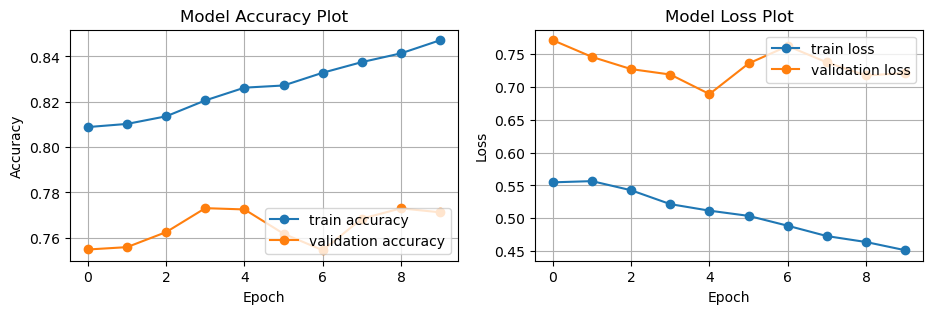

In [28]:
plt.figure(figsize=(35,3))
plt.subplot(1,6,1)
plt.title("Model Accuracy Plot")
plt.plot(h_rmsp.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h_rmsp.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,2)
plt.title("Model Loss Plot")
plt.plot(h_rmsp.history['loss'], 'o-', label='train loss')
plt.plot(h_rmsp.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [29]:
test_loss_rmsp1, test_acc_rmsp1 = model.evaluate(X_train, Y_train)
print("Test Accuracy- RMSprop")
print('\nTest Accuracy:', test_acc_rmsp1)
print('Test Loss:', test_loss_rmsp1)

1563/1563 [==============================] - 14s 9ms/step - loss: 0.3477 - accuracy: 0.8892
Test Accuracy- RMSprop

Test Accuracy: 0.88919997215271
Test Loss: 0.3476687967777252


In [17]:
adam_lr = 0.0001
beta1 = 0.99
beta2 = 0.9999
eps = 1e-9

optimizer_adam = keras.optimizers.Adam(learning_rate=adam_lr, beta_1=beta1, beta_2=beta2, epsilon=eps)

In [18]:
model.compile(
    optimizer= optimizer_adam, 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [41]:
h_adam = model.fit(x=X_train, y=Y_train, validation_split=0.25, batch_size=128, epochs=epoch)

Epoch 1/10
293/293 [==============================] - 71s 241ms/step - loss: 0.4374 - accuracy: 0.8494 - val_loss: 0.7176 - val_accuracy: 0.7708
Epoch 2/10
293/293 [==============================] - 66s 227ms/step - loss: 0.4222 - accuracy: 0.8563 - val_loss: 0.7393 - val_accuracy: 0.7708
Epoch 3/10
293/293 [==============================] - 65s 222ms/step - loss: 0.4227 - accuracy: 0.8564 - val_loss: 0.7318 - val_accuracy: 0.7730
Epoch 4/10
293/293 [==============================] - 65s 221ms/step - loss: 0.4126 - accuracy: 0.8579 - val_loss: 0.7232 - val_accuracy: 0.7790
Epoch 5/10
293/293 [==============================] - 66s 225ms/step - loss: 0.4005 - accuracy: 0.8628 - val_loss: 0.7564 - val_accuracy: 0.7713
Epoch 6/10
293/293 [==============================] - 66s 224ms/step - loss: 0.3971 - accuracy: 0.8646 - val_loss: 0.7343 - val_accuracy: 0.7755
Epoch 7/10
293/293 [==============================] - 66s 227ms/step - loss: 0.3876 - accuracy: 0.8683 - val_loss: 0.7443 - val_ac

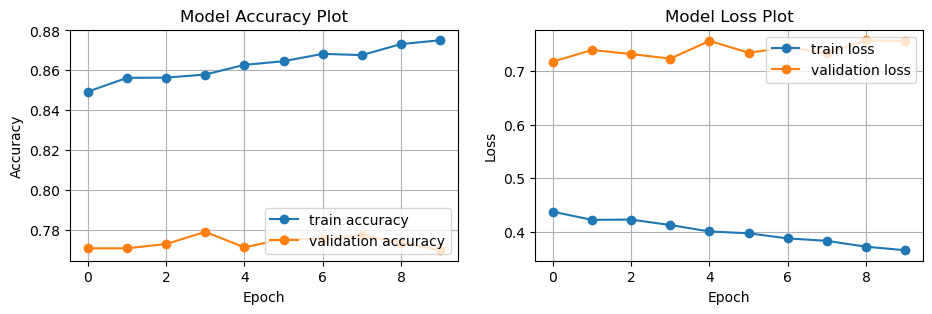

In [42]:
plt.figure(figsize=(35,3))
plt.subplot(1,6,1)
plt.title("Model Accuracy Plot")
plt.plot(h_adam.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h_adam.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,6,2)
plt.title("Model Loss Plot")
plt.plot(h_adam.history['loss'], 'o-', label='train loss')
plt.plot(h_adam.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [44]:
test_loss_adam1, test_acc_adam1 = model.evaluate(X_train, Y_train)
print("MODEL TEST ACCURACY WITH ADAM")
print('\nTest Accuracy:', test_acc_adam1)
print('Test Loss:', test_loss_adam1)

1563/1563 [==============================] - 14s 9ms/step - loss: 0.3034 - accuracy: 0.9077
MODEL TEST ACCURACY WITH ADAM

Test Accuracy: 0.9077000021934509
Test Loss: 0.30335533618927


In [30]:
model_names = 'Model'
model_histories = 'h'
optimizers = ['sgd', 'rmsp', 'adam']

max_accuracy_values = {optimizer: [] for optimizer in optimizers}
min_loss_values = {optimizer: [] for optimizer in optimizers}

for model_history in model_histories:
    for optimizer in optimizers:
        variable_name = f"{model_history.lower()}_{optimizer.lower()}"
        history = locals()[variable_name]
        max_accuracy_values[optimizer].append(max(history.history["accuracy"]))
        min_loss_values[optimizer].append(min(history.history["loss"]))

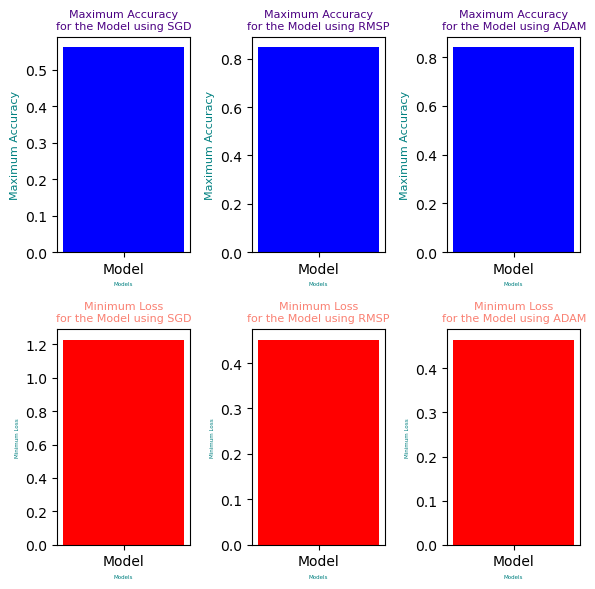

In [34]:
max_acc_indices = {optimizer: max_accuracy_values[optimizer].index(max(max_accuracy_values[optimizer])) for optimizer in optimizers}
min_loss_indices = {optimizer: min_loss_values[optimizer].index(min(min_loss_values[optimizer])) for optimizer in optimizers}


fig, axs = plt.subplots(2, len(optimizers), figsize=(6, 6))


for i, optimizer in enumerate(optimizers):
    axs[0, i].bar(model_names, max_accuracy_values[optimizer], color='cornflowerblue', label=optimizer)
    axs[0, i].bar(max_acc_indices[optimizer], max_accuracy_values[optimizer][max_acc_indices[optimizer]], color='blue')
    axs[0, i].set_xlabel('Models', size=4, color='teal')
    axs[0, i].set_ylabel('Maximum Accuracy', size=8, color='teal')
    axs[0, i].set_title(f'Maximum Accuracy\nfor the Model using {optimizer.upper()}', size=8, color='indigo')


for i, optimizer in enumerate(optimizers):
    axs[1, i].bar(model_names, min_loss_values[optimizer], color='coral', label=optimizer)
    axs[1, i].bar(min_loss_indices[optimizer], min_loss_values[optimizer][min_loss_indices[optimizer]], color='red')
    axs[1, i].set_xlabel('Models', size=4, color='teal')
    axs[1, i].set_ylabel('Minimum Loss', size=4, color='teal')
    axs[1, i].set_title(f'Minimum Loss\nfor the Model using {optimizer.upper()}', size=8, color='salmon')

plt.tight_layout()
plt.show()

Model
313/313 [==============================] - 3s 9ms/step


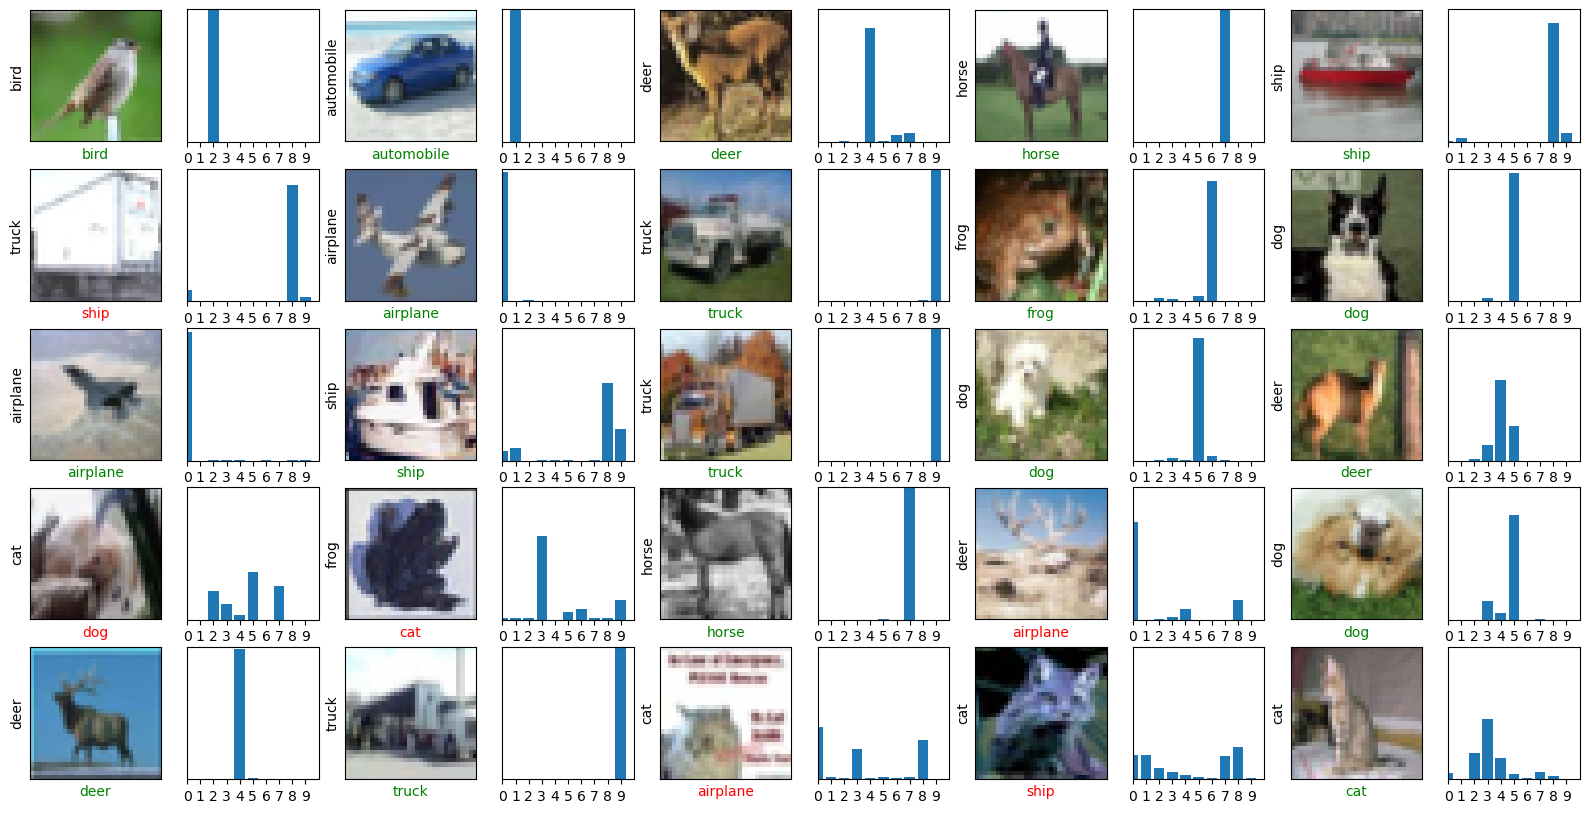

In [38]:
import random

models = [model]

for i, model in enumerate(models, start=1):
    print(f"Model")
    test_loss, test_acc = model.evaluate(X_train, Y_train)
    predictions = model.predict(X_test)

    random_indices = random.sample(range(len(X_test)), 25)

    rows = 5
    cols = 5

    plt.figure(figsize=(20, 10))
    for j, index in enumerate(random_indices):
        plt.subplot(rows, 2 * cols, 2 * j + 1)
        plt.imshow(X_test[index])
        plt.xticks([])
        plt.yticks([])
        plt.ylabel(class_names[Y_test[index][0]])
        if Y_test[index][0] == np.argmax(predictions[index]):
            plt.xlabel(class_names[np.argmax(predictions[index])], color='g')
        else:
            plt.xlabel(class_names[np.argmax(predictions[index])], color='r')

        plt.subplot(rows, 2 * cols, 2 * j + 2)
        plt.bar(range(10), predictions[index])
        plt.yticks([])
        plt.xticks(range(0, 10))
        plt.ylim([0, 1])
        plt.xlim([0, 10])

    plt.show()